In [1]:
# Visualize the data from HKMA APIs
# https://apidocs.hkma.gov.hk/

import math
import pandas as pd

# interative map
import folium

# bypass SSL cert
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
  ssl._create_default_https_context = ssl._create_unverified_context

# Enable Google interactive table
from google.colab import data_table
data_table.enable_dataframe_formatter()

# a library to convert the Latitude and Longitude from degree format to decimal
!pip install dms2dec
from dms2dec.dms_convert import dms2dec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Get the daily exchange rate from HKMA 
url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/er-ir/er-eeri-daily'

# Read the json URL output into a dataframe 
df = pd.read_json(url)
print(df)

                  header                                             result
success             True                                                NaN
err_code            0000                                                NaN
err_msg   No error found                                                NaN
datasize             NaN                                                100
records              NaN  [{'end_of_day': '2022-09-30', 'usd': 7.851, 'g...


In [3]:
# Extract the record result into another dataframe
ccyDf = pd.DataFrame(df.loc['records', 'result'])
ccyDf.set_index('end_of_day', inplace=True)

# Display the major ccy
ccyDf[['usd', 'gbp', 'cad', 'aud', 'cny', 'jpy', 'eur']]

,usd,gbp,cad,aud,cny,jpy,eur
end_of_day,,,,,,,
2022-09-30,7.851,8.7485,5.7335,5.098,1.10665,0.054365,7.7005
2022-09-29,7.851,8.4655,5.7195,5.068,1.08920,0.054220,7.5845
2022-09-28,7.851,8.3565,5.6910,4.998,1.08415,0.054215,7.4940
2022-09-27,7.851,8.4655,5.7455,5.100,1.09720,0.054385,7.5745
2022-09-26,7.851,8.3785,5.7650,5.101,1.09675,0.054555,7.5795
...,...,...,...,...,...,...,...
2022-06-08,7.848,9.8610,6.2555,5.647,1.17535,0.058850,8.3855
2022-06-07,7.847,9.7830,6.2265,5.644,1.17595,0.059080,8.3885
2022-06-06,7.847,9.8370,6.2395,5.656,1.17875,0.060095,8.4215


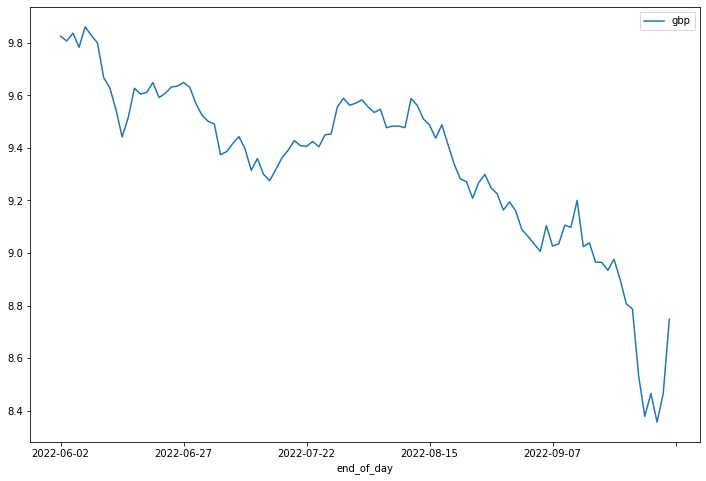

In [4]:
# sort the date in asc order and plot the graph
ccyDf[['gbp']].sort_index().plot(figsize = (12, 8))

In [ ]:
# Browse other HKMA examples: https://apidocs.hkma.gov.hk/apidata/
# and find the corresponding data link in the https://apidocs.hkma.gov.hk/

In [5]:
# Hospitals info from HA
url = 'http://www.ha.org.hk/opendata/facility-hosp.json'
dfHospital = pd.read_json(url)
dfHospital

,cluster_eng,institution_eng,with_AE_service_eng,address_eng,cluster_tc,institution_tc,with_AE_service_tc,address_tc,cluster_sc,institution_sc,with_AE_service_sc,address_sc,latitude,longitude
0,Hong Kong East Cluster,"Cheshire Home, Chung Hom Kok",No,"128 Chung Hom Kok Road, HK",港島東醫院聯網,舂磡角慈氏護養院,否,香港舂磡角道128號,港岛东医院联网,舂磡角慈氏护养院,否,香港舂磡角道128号,22.212024,114.19730
1,Hong Kong East Cluster,Pamela Youde Nethersole Eastern Hospital,Yes,"3 Lok Man Road, Chai Wan, HK",港島東醫院聯網,東區尤德夫人那打素醫院,是,香港柴灣樂民道3號,港岛东医院联网,东区尤德夫人那打素医院,是,香港柴湾乐民道3号,22.269180,114.23643
2,Hong Kong East Cluster,Ruttonjee Hospital,Yes,"266 Queen's Road East, Wan Chai, HK",港島東醫院聯網,律敦治醫院,是,香港灣仔皇后大道東266號,港岛东医院联网,律敦治医院,是,香港湾仔皇后大道东266号,22.275909,114.17529
3,Hong Kong East Cluster,St. John Hospital,Yes,"Cheung Chau Hospital Road, Tung Wan, Cheung Chau",港島東醫院聯網,長洲醫院,是,長洲東灣長洲醫院路,港岛东医院联网,长洲医院,是,长洲东湾长洲医院路,22.208059,114.03151
4,Hong Kong East Cluster,Tang Shiu Kin Hospital,No,"282 Queen's Road East, Wan Chai, HK",港島東醫院聯網,鄧肇堅醫院,否,香港灣仔皇后大道東282號,港岛东医院联网,邓肇坚医院,否,香港湾仔皇后大道东282号,22.275313,114.17774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,,,,,,,,,,,,,NaN,NaN
151,,,,,,,,,,,,,NaN,NaN
152,,,,,,,,,,,,,NaN,NaN
153,,,,,,,,,,,,,NaN,NaN


In [ ]:
# Create an interactive folium map and zoom to HK
HK_LAT, HK_LONG = 22.3, 114.2
hmap = folium.Map(location=[HK_LAT, HK_LONG], zoom_start=11)

# From each row of the footbook dataframe, pin the location in the map with the name and opening_time by a tooltip 
for row in dfHospital.itertuples():
  tip = row.institution_eng
  #tip = row.institution_tc
  if math.isnan(row.latitude) == False and math.isnan(row.longitude) == False:
    folium.Marker([row.latitude, row.longitude], tooltip=tip).add_to(hmap)

hmap

In [ ]:
# save the hospital map
hmap.save('hospital.html')

In [ ]:
# Other examples
# All other JSON format: https://data.gov.hk/en-datasets/format/json
# All other CSV format: https://data.gov.hk/en-datasets/format/csv

# Idea
# Use the Gov open data (such as pollution index, beach water quality) to track health for pharmaceutical stocks
